In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('iphone_purchase_records.csv')
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [4]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
# apply label encoder to the gender column
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["Gender"] = lb.fit_transform(data["Gender"])

In [6]:
data

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   Salary           400 non-null    int64
 3   Purchase Iphone  400 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.1 KB


In [8]:
data.corr()

,Gender,Age,Salary,Purchase Iphone
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
Salary,-0.060435,0.155238,1.000000,0.362083
Purchase Iphone,-0.042469,0.622454,0.362083,1.000000


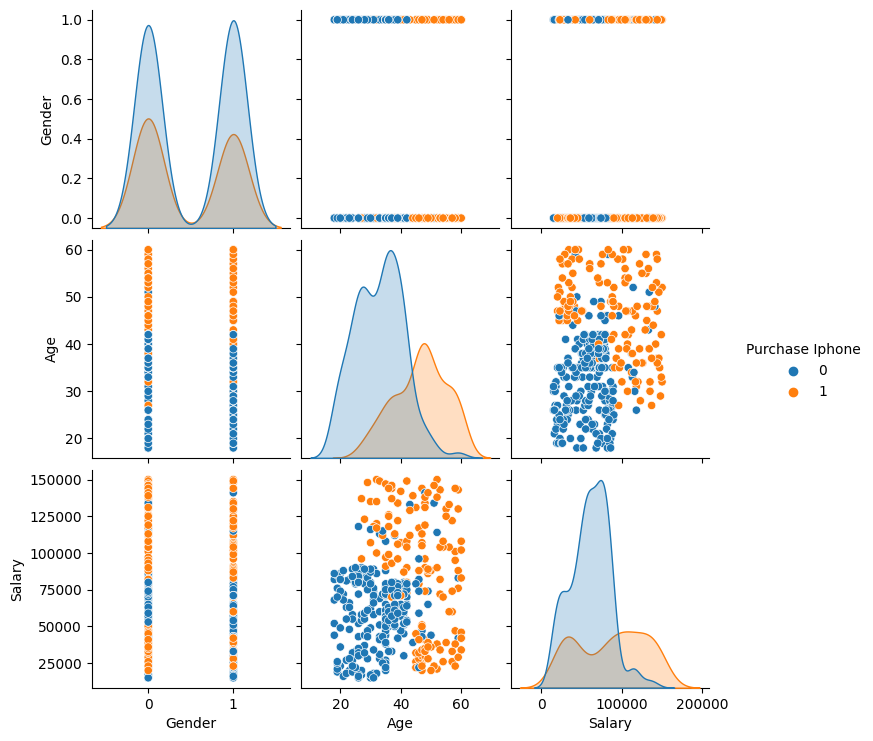

In [10]:
sns.pairplot(data, hue='Purchase Iphone')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


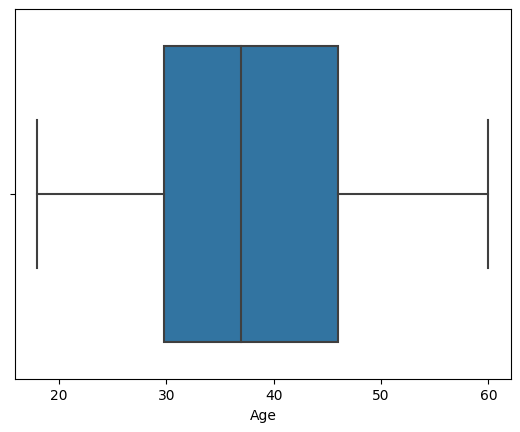

In [38]:
# apply box plot
sns.boxplot(data.Age)
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


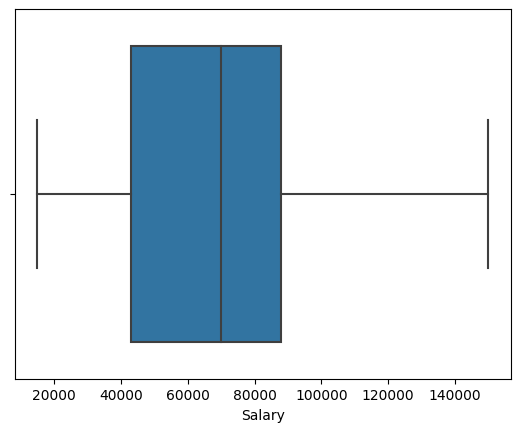

In [39]:
sns.boxplot(data.Salary)
plt.show()

In [18]:
# scaling the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_scaled = std.fit_transform(data.iloc[:,:-1])

In [24]:
X = data_scaled
Y = data.iloc[:,-1]

In [25]:
X.shape

(400, 3)

In [27]:
Y.shape

(400,)

In [28]:
# data spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [29]:
# apply KNN
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

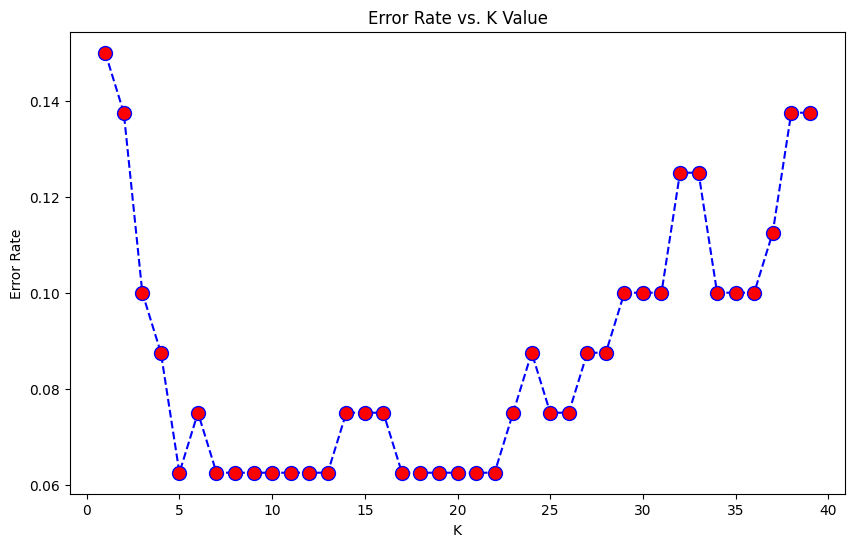

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_list = []
for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train, y_train)
    y_predict_i = knn_i.predict(x_test)  
    accuracy = accuracy_score(y_test, y_predict_i)
    accuracy_list.append(accuracy)

Text(0, 0.5, 'Accuracy')

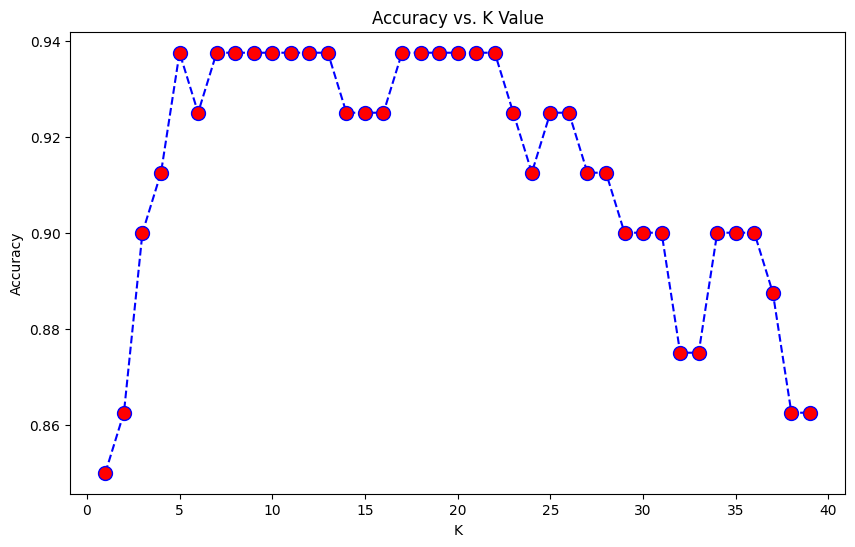

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
# we conclude that best k = 5 